In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [19]:
#ładowanie zbioru cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [39]:
#pobieranie własnych obrazów
image_path = "bird_2.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image,channels=3)
image = tf.image.resize(image,[32,32])
image = tf.expand_dims(image,axis=0)

#normalizacja [0,1]
image = tf.image.convert_image_dtype(image,tf.float32)

In [22]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
#konwersja etykiet na posta one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
#budowa modelu sieci konwolucyjnej (CNN)
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3),activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3),activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3),activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(3,3),activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3),activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [27]:
#propagacja wsteczna
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3437 - loss: 2.1645 - val_accuracy: 0.5785 - val_loss: 1.1803
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5673 - loss: 1.2236 - val_accuracy: 0.6137 - val_loss: 1.1596
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6669 - loss: 0.9403 - val_accuracy: 0.7246 - val_loss: 0.7842
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7096 - loss: 0.8175 - val_accuracy: 0.7060 - val_loss: 0.8432
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7379 - loss: 0.7480 - val_accuracy: 0.7492 - val_loss: 0.7200
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7632 - loss: 0.6719 - val_accuracy: 0.7458 - val_loss: 0.7779
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7786 - loss: 0.6297 - val_accuracy: 0.7794 - val_loss: 0.6416
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8010 - loss: 0.5746 - val_accur

In [29]:
#ewaluacja modelu
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8019 - loss: 0.5861
Test accuracy: 0.7998999953269958


In [30]:
#wykonanie predykcji
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [36]:
#funkcja wizualizacji
def visualize_predictions(x_test,y_test,predictions,class_names,num_samples=10):
    plt.figure(figsize=(8,8))
    for i in range(num_samples):
        plt.subplot(5,5,i+1)
        plt.imshow(x_test[i])
        plt.axis('off')
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(y_test[i])
        if predicted_class == true_class:
            plt.title(f"{class_names[predicted_class]},\nTrue class: {class_names[true_class]}",color='green',fontsize=8)
        else:
            plt.title(f"{class_names[predicted_class]},\nTrue class: {class_names[true_class]}",color='red',fontsize=8)
    plt.tight_layout()
    plt.show()

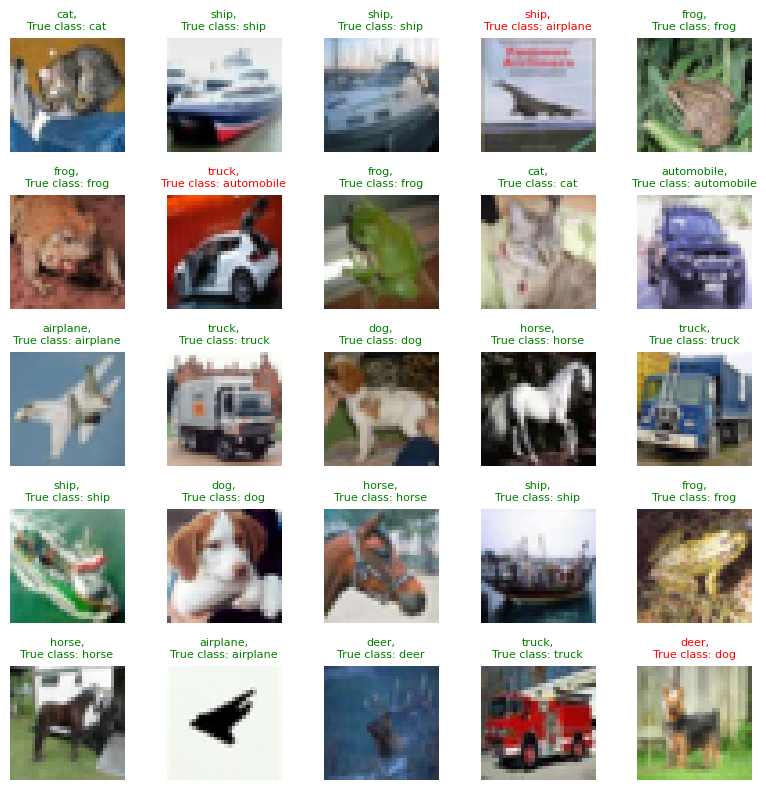

In [37]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
visualize_predictions(x_test,y_test,predictions,class_names,25)

In [40]:
image = tf.image.resize(image,[32,32])
single_prediction = model.predict(image)
predicted_class = np.argmax(single_prediction)
print(f"Predicted class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: horse
